<a href="https://colab.research.google.com/github/sarychief/BMSTU/blob/main/lab2-optimization/lab2_optimization_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.metrics import mean_squared_error
%matplotlib inline


random.seed(0)
np.random.seed(0)

Считываем данные не сразу pd.read_csv, потому что таким образом проще сплитить данные, ибо исходный df имеет склеенные фичи и предикторы.

In [347]:
data = []
with open("/content/lab1.csv", "r") as f:
  for i in f:
    row = i.split()
    data.append([float(row[0]), float(row[1])])

data = pd.DataFrame(data)

In [348]:
data.shape

(40, 2)

In [349]:
data.head()

,0,1
0,1.762616,-0.255949
1,7.954275,-59.537454
2,7.830615,-58.237982
3,6.316750,-14.521705
4,-9.282208,-32.656908


In [350]:
X = data[0]
y = data[1]

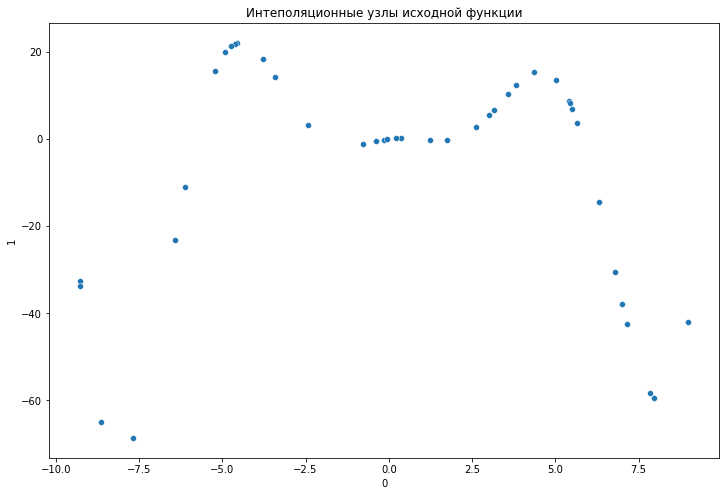

In [351]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X, y=y)
plt.title("Интеполяционные узлы исходной функции")
plt.show()

## В качестве аппросимирующей функции выбираем полиномиальную регрессию

In [352]:
# Найдем наилучшую степень полинома по результатам лосса
def find_best_loss_value(X, y, max_degree=30):
  v_mse = {}
  for n in range(1, max_degree+1):
    y_pred = pd.Series(dtype=pd.StringDtype()) 
    model = np.polyfit(X, y, n)
    predict = np.poly1d(model)
    for i in X:
      y_pred = y_pred.append(pd.Series([predict(i)]), ignore_index=True)
    print("Полином", n, "степени имеет MSE =", mean_squared_error(y, y_pred))
    v_mse[n] = mean_squared_error(y, y_pred)
  return v_mse

In [353]:
v = find_best_loss_value(X, y)

Полином 1 степени имеет MSE = 656.0270117946209
Полином 2 степени имеет MSE = 267.63180504988276
Полином 3 степени имеет MSE = 267.5830380428292
Полином 4 степени имеет MSE = 239.01738810203514
Полином 5 степени имеет MSE = 232.03269777190798
Полином 6 степени имеет MSE = 18.6425031442373
Полином 7 степени имеет MSE = 18.61618425466508
Полином 8 степени имеет MSE = 10.708805004282851
Полином 9 степени имеет MSE = 9.359497388890455
Полином 10 степени имеет MSE = 0.5908704423756331
Полином 11 степени имеет MSE = 0.40736718983263565
Полином 12 степени имеет MSE = 0.005774754590376104
Полином 13 степени имеет MSE = 0.0032447298036645394
Полином 14 степени имеет MSE = 2.1667179928215693e-05
Полином 15 степени имеет MSE = 1.635643042441097e-05
Полином 16 степени имеет MSE = 1.9909811570222684e-07
Полином 17 степени имеет MSE = 7.924782435076047e-08
Полином 18 степени имеет MSE = 3.472059533086646e-10
Полином 19 степени имеет MSE = 8.206248938783235e-11
Полином 20 степени имеет MSE = 1.749642

In [354]:
# еще думаю
print(list(v.keys())[list(v.values()).index(0.005774754590376104)])

12


### Вывод полинома, имея оптимальную степень


In [355]:
best_model = np.polyfit(X, y, 13)
predict = np.poly1d(best_model)
print(predict)

           13             12             11             10
1.806e-10 x  + 8.444e-09 x  - 4.817e-08 x  - 2.633e-06 x 
              9             8             7           6           5
 + 5.688e-06 x + 0.0003142 x - 0.0003977 x - 0.01654 x + 0.01613 x
           4          3         2
 + 0.3186 x - 0.2804 x - 0.932 x + 0.8228 x - 0.04395


### Так же можно посмотреть какой была бы аппроксимация полиномиальной регрессией n-го порядка

In [356]:
def polynomregression(n):
  y_pred = pd.Series(dtype=pd.StringDtype()) 
  model = np.polyfit(X, y, n)
  predict = np.poly1d(model)
  for i in X:
    y_pred = y_pred.append(pd.Series([predict(i)]), ignore_index=True)
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x=X, y=y, label='Интерполяционные узлы')
  sns.scatterplot(x=X, y=y_pred, label='Построение полинома')
  plt.title("Интеполяционные узлы исходной функции")
  plt.show()

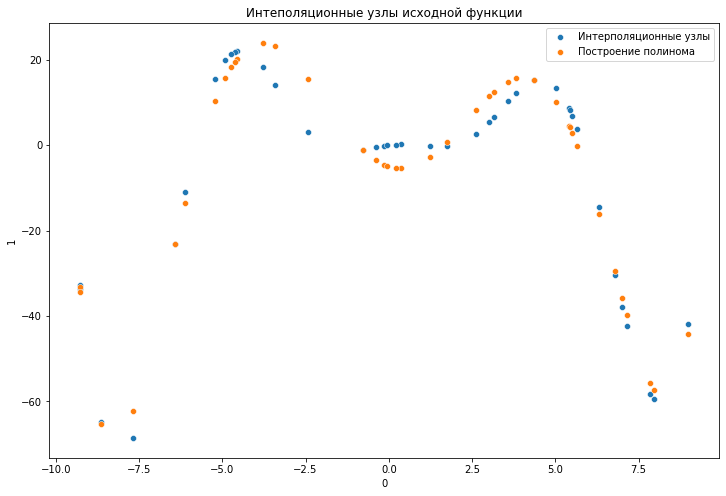

In [357]:
polynomregression(7) 